In [338]:
import scipy
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from tqdm.auto import tqdm

In [358]:
N = 2000
m = 2
e = pow(10, -3)
F_param = -2.8
delta_t = 1
n = 10

In [359]:
def calc_activity():
    return pow(np.random.uniform(
        pow(e,F_param), pow(1,F_param), size=N
    ), 1/F_param)*n

In [360]:
activity_level_of_nodes = calc_activity()

  0%|          | 0/10000 [00:00<?, ?it/s]

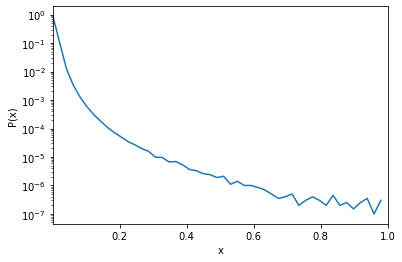

In [436]:
activity_level_of_nodes = calc_activity()
res_agg = []
for i in tqdm(range(10000)):
    activity_level_of_nodes = calc_activity()
    res_tmp, res2 = np.histogram(
        activity_level_of_nodes, bins = np.linspace(e, 1, num = 50)
    )  
    res_agg.append(res_tmp)
res_agg = np.array(res_agg).mean(axis = 0)
res_agg = res_agg/res_agg.sum()

plt.xlim(e, 1)
# plt.xscale('log')
plt.yscale('log')
plt.xlabel('x')
plt.ylabel('P(x)')

plt.plot(res2[:-1], res_agg)
# plt.scatter(res2[:-1], res_agg, color='r')

plt.show()


In [8]:
def sis_init(start_I_population_size = 5):
    S = 0
    I = 1
    population = np.zeros(N).astype(int)
    population[np.random.choice(N, start_I_population_size, False)] = 1
    return population

In [12]:
def adn_step():
    active_nodes = (
        activity_level_of_nodes * delta_t > np.random.uniform(0, 1, N)
    )
    active_nodes = np.nonzero(active_nodes)[0]
    edge_candidates = np.repeat(active_nodes, m)
    edges = np.stack(
        [edge_candidates, np.random.choice(range(N), len(edge_candidates))]
    )
    conflicts = edges[0] == edges[1]
    while conflicts.sum():
        edges[1][conflicts] = np.random.choice(range(N), conflicts.sum())
        conflicts = edges[0] == edges[1]
    edges = edges.transpose()
    unique_edges = np.unique(np.sort(edges, axis=1), axis = 1)
    
    return unique_edges

In [13]:
get_state_of_connected_people = np.vectorize(lambda x: population[x])

def sis_step(edges):
    state_of_connected_people = np.sum(
        get_state_of_connected_people(edges), axis = 1
    )
    SI_pairs = edges[np.where(state_of_connected_people==1)]
    SI_pairs_to_change = SI_pairs[np.random.uniform(size=len(SI_pairs)) < B]
    
    
    population[population == 1] = (
        (np.random.uniform(size=population.sum()) > u) * 1
    )
    
    population[SI_pairs_to_change.flatten()] = 1

## ADN simulation

  0%|          | 0/1 [00:00<?, ?it/s]

0it [00:00, ?it/s]

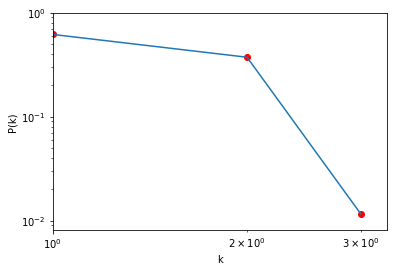

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

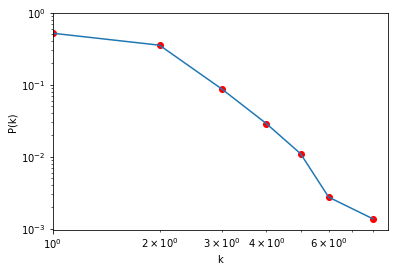

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

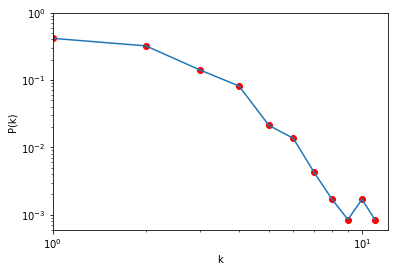

In [444]:
for K in [1, 10, 20]:
    cum_res = []

    for index_of_try in tqdm(range(1000)):
        activity_level_of_nodes = calc_activity()
        res = adn_step()
        for i in tqdm(range(K-1), leave=False):
            res = np.concatenate([res, adn_step()])

        res = np.unique(res, axis = 1)
        _, node_degrees = np.unique(res.flatten(), return_counts=True)

        cum_res.extend(node_degrees)

    sizes, counts = np.unique(cum_res, return_counts = True)

    plt.xlim(1, max(sizes)*1.1)
    plt.ylim(min(counts/len(cum_res))*0.7, 1)

    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('k')
    plt.ylabel('P(k)')
    plt.plot(sizes, counts/len(cum_res))
    plt.scatter(sizes, counts/len(cum_res), color='r')

    plt.show()

## SIS simulation

In [447]:
B = 0.5
u = 1/14
N = 2000
start_population = int(N * 0.1)
m = 3
max_time = 10

In [448]:
activity_level_of_nodes = calc_activity()
population = sis_init(start_population)
infected_count = []
cumulative_edges = adn_step()
for _ in tqdm(range(max_time-1)):
    sis_step(cumulative_edges)
    infected_count.append(population.sum())
    edges = adn_step()
    cumulative_edges = np.unique(np.concatenate([cumulative_edges, edges]), axis = 1)
#     cumulative_edges = edges

  0%|          | 0/9 [00:00<?, ?it/s]

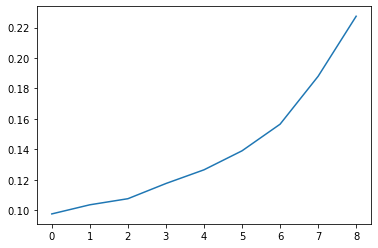

In [449]:
plt.plot(np.array(infected_count)/N)

In [ ]:
# badania dla roznych B i u
# star population 10%
# porownac bez usuwania polaczen co krok
# wykres pk
# wykres histogramu aktywnosci